<a href="https://colab.research.google.com/github/SebastianRodriguez05/SyS/blob/main/Parcial_2/Parcial_2_TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## 📘 PARCIAL - PUNTO (a)
# Modelos y problemas de optimización
---


## 1. PCA (Análisis de Componentes Principales)

- Tipo de modelo: No supervisado, reducción de dimensionalidad.
- Propósito: Encontrar nuevas variables (componentes) que son combinaciones lineales de las variables originales y que explican la mayor varianza posible de los datos.
- Supuestos: Las direcciones con mayor varianza contienen más información útil.

### Proceso:

1. Centrar los datos: $ X = X - \mu $
2. Calcular matriz de covarianza:  
   $$
   \Sigma = \frac{1}{n} X^\top X
   $$
3. Buscar la dirección $ w $ que maximiza la varianza:
   $$Var(Xw)=w ⊤Σw$$

   Para evitar que $ w $ crezca sin límite, se impone una restricción de norma:
   $\|w\|^2 = 1$

### ✅ Problema de optimización:

$$
\boxed{\max_{w} \quad w^\top \Sigma w \quad \text{s.a. } \|w\|^2 = 1}
$$

La solución se obtiene con los autovectores de $ \Sigma $.


## 📌 2. UMAP (Uniform Manifold Approximation and Projection)

- Tipo: Reducción de dimensionalidad no lineal (no supervisado)
- Objetivo: Preservar la estructura local del espacio original en el espacio embebido.
- Supuestos: Los datos residen en una variedad Riemanniana con estructura topológica conservable.

### 🔍 Proceso:

1. Construir grafo ponderado de conectividad local en alta dimensión.
2. Definir probabilidades de conexión $ p_{ij} $ usando funciones kernel adaptativas.
3. En el espacio reducido, definir una distribución de conexión $ q_{ij} $.
4. Minimizar la divergencia cruzada entre $ p_{ij} $ y $ q_{ij} $.

### ✅ Problema de optimización:

$
\boxed{
\mathcal{L} = \sum_{i < j} \left[ -p_{ij} \log(q_{ij}) - (1 - p_{ij}) \log(1 - q_{ij}) \right]
}
$


## 📌 3. Gaussian Naive Bayes

- Tipo: Clasificador probabilístico supervisado.
- Supuestos: Las características son independientes entre sí dado la clase. Cada característica sigue una distribución Gaussiana por clase.

### 🔍 Proceso:

1. Se aplica el teorema de Bayes:
$$
P(y=c \mid x) = \frac{P(x \mid y=c) P(y=c)}{P(x)}
$$
2. Suponiendo independencia condicional:
$$
P(x \mid y=c) = \prod_j P(x_j \mid y=c)
$$
3. Para cada característica:
$$
P(x_j \mid y=c) = \mathcal{N}(x_j; \mu_{jc}, \sigma_{jc}^2)
$$

### ✅ No hay optimización iterativa:

Los parámetros $ \mu_{jc}, \sigma_{jc}^2, P(y=c) $ se estiman directamente con estadísticas.


## 📌 4. SGDClassifier

- Tipo: Clasificador lineal supervisado.
- Objetivo: Minimizar una función de pérdida usando descenso de gradiente estocástico.
- Supuestos: La función de pérdida es diferenciable.

### 🔍 Proceso:

1. Elegir una función de pérdida:
   - Hinge (SVM): $ \max(0, 1 - y w^\top x) $
   - Log-loss: $ \log(1 + e^{-y w^\top x}) $
2. Añadir regularización $ R(w) $ (e.g. L2).
3. Actualizar parámetros con descenso estocástico.

### ✅ Problema de optimización:

$$
\boxed{
\min_w \frac{1}{n} \sum_{i=1}^n \mathcal{L}(y_i, w^\top x_i) + \lambda R(w)
}
$$


## 📌 5. Logistic Regression

- Tipo: Clasificador probabilístico supervisado (binario o multiclase).
- Supuestos: Los datos se separan con una combinación lineal.

### 🔍 Proceso:

1. Función sigmoide:
$$
P(y = 1 \mid x) = \frac{1}{1 + e^{-w^\top x}}
$$
2. Pérdida logarítmica (log-loss):
$$
\mathcal{L}(y, \hat{y}) = -y \log(\hat{y}) - (1 - y)\log(1 - \hat{y})
$$
3. Regularización L2: $ \|w\|^2 $

### ✅ Problema de optimización:

$$
\boxed{
\min_{w} \frac{1}{n} \sum_{i=1}^{n} \log(1 + e^{-y_i w^\top x_i}) + \lambda \|w\|^2
}
$$


## 📌 6. Linear Discriminant Analysis (LDA)

- Tipo: Clasificador supervisado basado en proyección.
- Supuestos: Las clases siguen una distribución Gaussiana con la misma matriz de covarianza.

### 🔍 Proceso:

1. Calcular las medias $ \mu_k $, media global $ \mu $, y matrices:
   - $ S_W $: Dispersión intra-clase
   - $ S_B $: Dispersión entre clases
2. Función objetivo:
$$
J(w) = \frac{w^\top S_B w}{w^\top S_W w}
$$

### ✅ Problema de optimización:

$$
\boxed{
\max_w \frac{w^\top S_B w}{w^\top S_W w}
}
$$


## 📌 7. K-Nearest Neighbors (KNN)

- Tipo: Clasificador supervisado, no paramétrico.
- Supuestos: Las observaciones cercanas tienden a compartir etiqueta.

### 🔍 Proceso:

1. Calcular distancia entre la nueva muestra y las de entrenamiento.
2. Seleccionar los $ k $ vecinos más cercanos.
3. Votar por la clase más común.

### ✅ No hay entrenamiento ni optimización:

$$
\boxed{
\hat{y} = \text{majority\_vote}(y_{\text{vecinos\ más\ cercanos}})
}
$$



## 📌 8. SVC (Support Vector Classifier)

- Tipo: Clasificador supervisado de margen máximo.
- Supuestos: Las clases pueden ser separadas con un margen (lineal o con kernel).

### 🔍 Proceso:

1. Definir restricciones:
$$
y_i(w^\top x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$
2. Maximizar el margen penalizando errores.

### ✅ Problema de optimización:

$$
\boxed{
\min_{w, b, \xi} \frac{1}{2}\|w\|^2 + C \sum \xi_i \quad \text{s.a. } y_i(w^\top x_i + b) \geq 1 - \xi_i
}
$$


## 📌 9. Random Forest Classifier

- Tipo: Ensamble de árboles (clasificación supervisada).
- Supuestos: Los árboles entrenados en subconjuntos aleatorios generalizan mejor.

### 🔍 Proceso:

1. Entrenar múltiples árboles con bootstrap samples.
2. Cada árbol divide minimizando impureza Gini o entropía.

### ✅ Problema local por nodo:

$$
\boxed{
\min_{\text{split}} \; \text{Gini o Entropía}
}
$$
Y predicción global por votación:
$$
\boxed{
\hat{y} = \text{majority\_vote}(h_j(x))
}
$$


## 📌 10. Gaussian Process Classifier

- Tipo: Clasificador probabilístico no paramétrico.
- Supuestos: Las funciones subyacentes siguen un proceso Gaussiano.

### 🔍 Proceso:

1. Definir kernel $ k(x,x') $ y media $ m(x) $.
2. Calcular la distribución posterior sobre funciones.
3. Aproximar la integral marginal:

$$
p(y \mid X) = \int p(y \mid f) \, p(f \mid X) \, df
$$

### ✅ Problema de optimización:

$$
\boxed{
\log p(y \mid X) \text{ (aproximado con Laplace, EP o VI)}
}
$$


## 📌 11. Deep Learning Classifiers

- Tipo: Clasificador supervisado con redes neuronales.
- Supuestos: La composición de funciones no lineales puede aproximar funciones arbitrarias.

### 🔍 Proceso:

1. Capas ocultas:
$$
a^{(l)} = \phi(W^{(l)} a^{(l-1)} + b^{(l)})
$$
2. Salida softmax:
$$
\hat{y} = \text{softmax}(a^{(L)})
$$
3. Pérdida de entropía cruzada:
$$
\mathcal{L}(y, \hat{y}) = - \sum_k y_k \log(\hat{y}_k)
$$

### ✅ Problema de optimización:

$$
\boxed{
\min_\theta \frac{1}{n} \sum \mathcal{L}(f_\theta(x_i), y_i) + \lambda \|\theta\|^2
}
$$


##Segundo punto

In [ ]:
# 📌 Punto (b) - Proyección del dataset USPS con PCA y UMAP

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import umap
from sklearn.preprocessing import StandardScaler

# Configurar estilo de plots
plt.style.use("seaborn-v0_8")


In [ ]:
# 1. 📥 Cargar y preparar el dataset USPS

usps = fetch_openml("usps", version=1, as_frame=False)
X = usps.data
y = usps.target.astype(int)

print("Shape de datos:", X.shape)  # (9298, 256)


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(


Shape de datos: (9298, 256)


In [ ]:
# 2. 🔧 Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


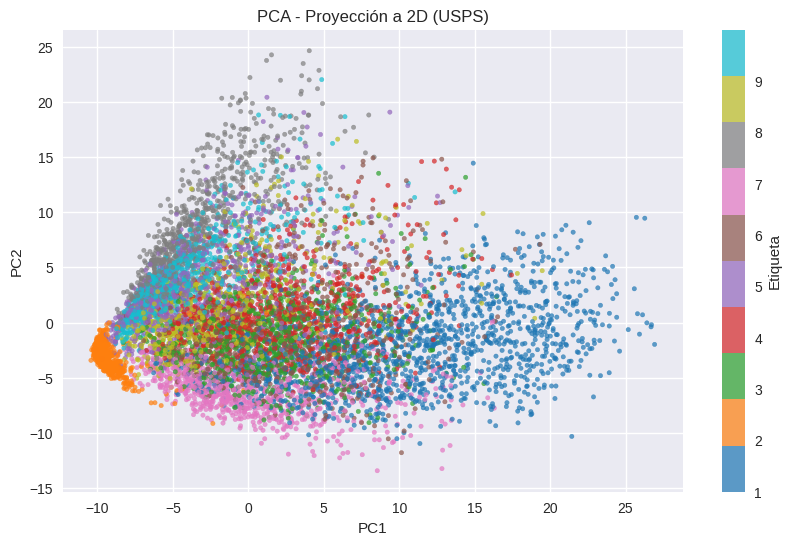

In [ ]:
# 3. 📊 Proyección con PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label='Etiqueta')
plt.title("PCA - Proyección a 2D (USPS)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


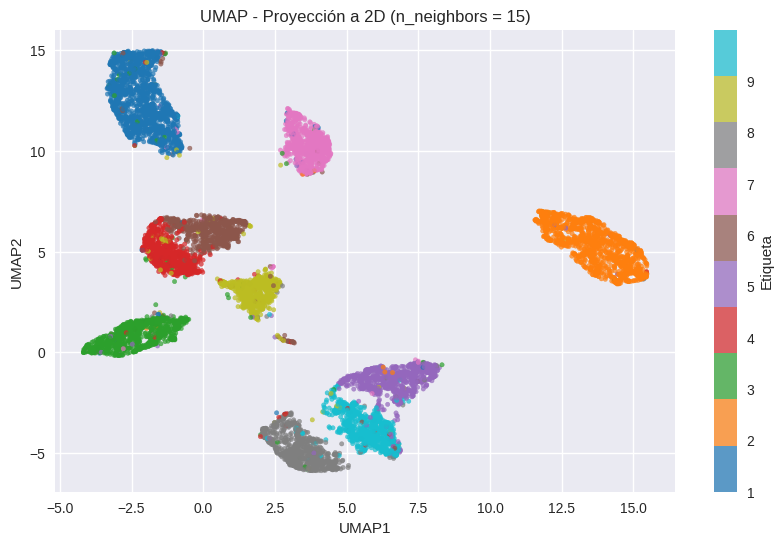

In [ ]:
# 4. 📊 Proyección con UMAP (vecinos = 15 por defecto)

umap_model = umap.UMAP(n_neighbors=15, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label='Etiqueta')
plt.title("UMAP - Proyección a 2D (n_neighbors = 15)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.grid(True)
plt.show()


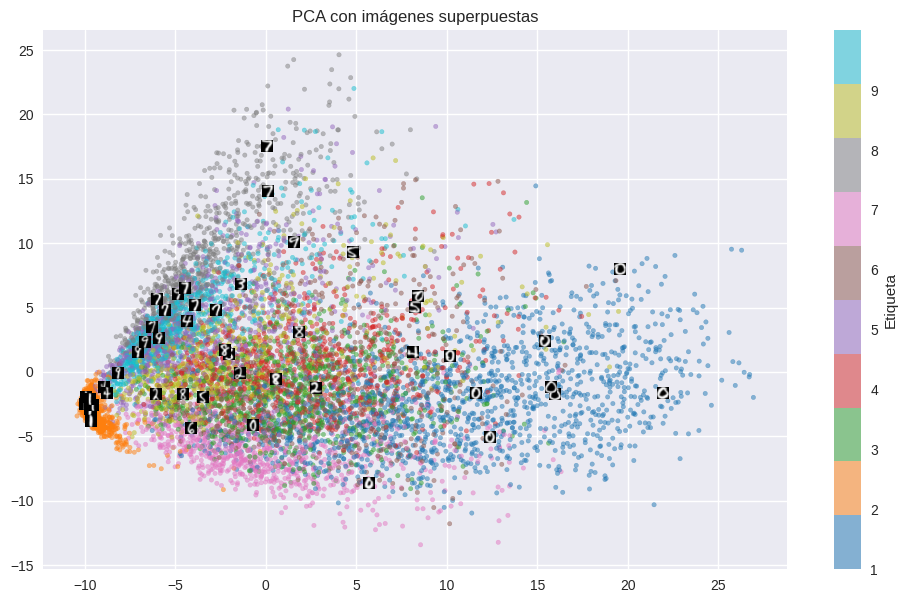

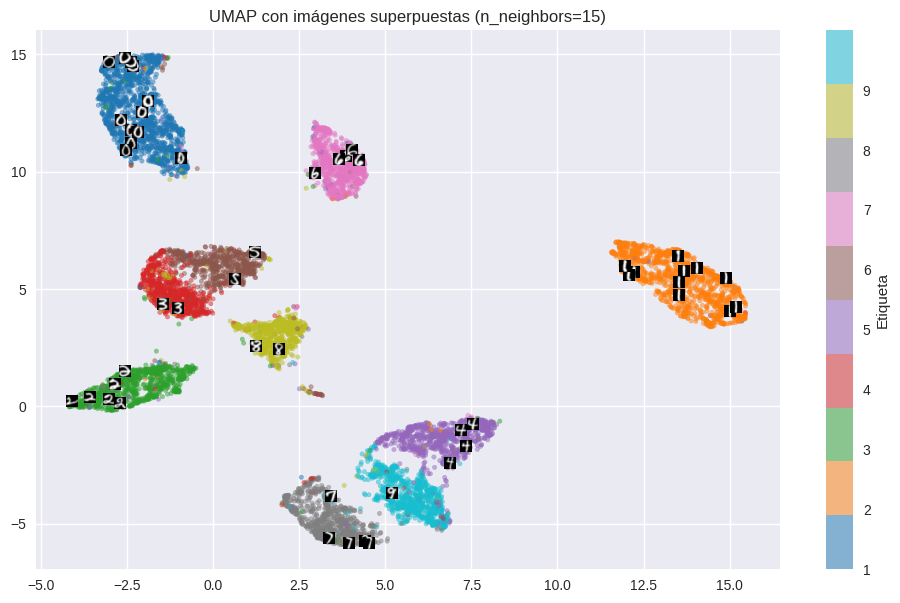

In [ ]:
# 5. 🖼️ Superposición de imágenes representativas

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def plot_with_images(X_proj, images, labels, title, max_images=50):
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.set_title(title)
    scatter = ax.scatter(X_proj[:, 0], X_proj[:, 1], c=labels, cmap='tab10', s=10, alpha=0.5)
    shown_images = 0
    for i in range(len(X_proj)):
        if shown_images >= max_images:
            break
        if np.random.rand() < 0.02:
            img = OffsetImage(images[i].reshape(16, 16), zoom=0.5, cmap='gray')
            ab = AnnotationBbox(img, (X_proj[i, 0], X_proj[i, 1]), frameon=False)
            ax.add_artist(ab)
            shown_images += 1
    plt.colorbar(scatter, ticks=range(10), label="Etiqueta")
    plt.grid(True)
    plt.show()

# Convertimos X original a imágenes (16x16)
images = X.reshape(-1, 16, 16)

plot_with_images(X_pca, X, y, "PCA con imágenes superpuestas")
plot_with_images(X_umap, X, y, "UMAP con imágenes superpuestas (n_neighbors=15)")


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


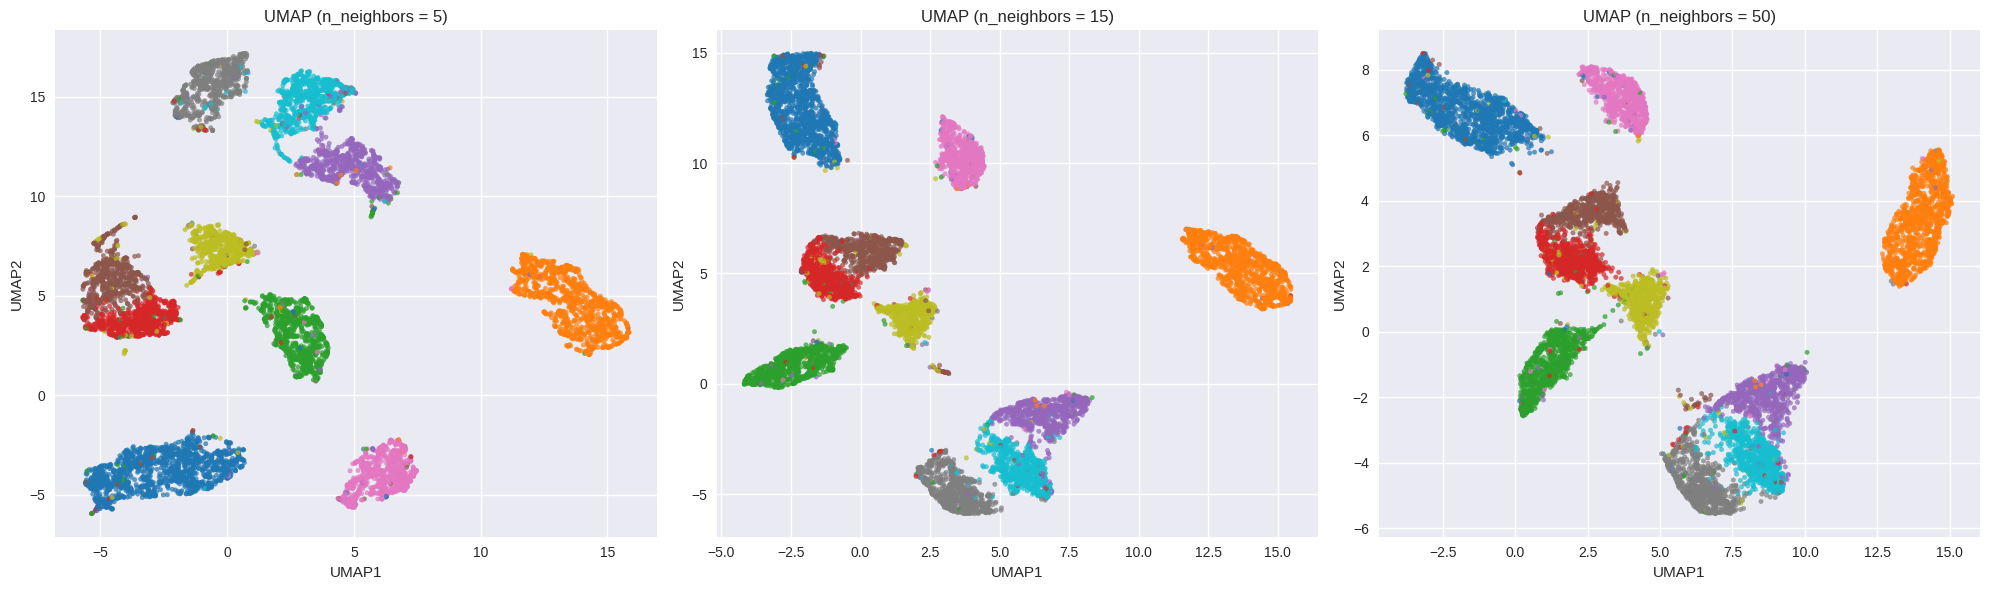

In [ ]:
# 6. 📈 Comparación con diferentes valores de n_neighbors en UMAP

neighbors_list = [5, 15, 50]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, n in enumerate(neighbors_list):
    umap_model = umap.UMAP(n_neighbors=n, random_state=42)
    X_umap = umap_model.fit_transform(X_scaled)
    axes[i].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', s=10, alpha=0.7)
    axes[i].set_title(f"UMAP (n_neighbors = {n})")
    axes[i].set_xlabel("UMAP1")
    axes[i].set_ylabel("UMAP2")

plt.tight_layout()
plt.show()


## 🧠 Análisis y Discusión

- **PCA** proyecta los datos maximizando la varianza, pero no capta bien la estructura no lineal. Clusters de dígitos pueden superponerse.
- **UMAP**, al preservar la estructura local, revela agrupaciones mucho más claras de las clases.
- Al variar `n_neighbors`:
  - Con `n=5`, se exageran las separaciones locales → aparecen más grupos fragmentados.
  - Con `n=50`, se tiende a agrupar más globalmente → menor separación entre dígitos.
  - `n=15` es un punto intermedio, donde se balancea bien la estructura global y local.

**Conclusión**: El parámetro `n_neighbors` controla el "nivel de granularidad" de la proyección en UMAP. Valores bajos capturan más detalles locales, mientras que valores altos suavizan el espacio latente.


##Punto 3

In [ ]:
# 🔁 Importar clasificadores y herramientas de evaluación

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [ ]:
# 🧪 Preparar datos proyectados (usamos proyecciones de punto b)

# Usar X_pca y X_umap de punto (b)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, stratify=y, random_state=42)
X_train_umap, X_test_umap, _, _ = train_test_split(X_umap, y, test_size=0.3, stratify=y, random_state=42)

# Binarizar etiquetas para ROC multiclase
y_bin = label_binarize(y, classes=list(range(10)))
y_train_bin = label_binarize(y_train, classes=list(range(10)))
y_test_bin = label_binarize(y_test, classes=list(range(10)))


In [ ]:
# ⚙️ Función para entrenar y evaluar un clasificador

def train_and_evaluate(model, X_train, X_test, y_train, y_test, name=""):
    print(f"\n🔍 Modelo: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\n📊 Classification Report:\n")
    print(classification_report(y_test, y_pred))

    print("📉 Confusion Matrix:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
        y_true_bin = label_binarize(y_test, classes=list(range(10)))

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(10):
            fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure(figsize=(10, 7))
        for i in range(10):
            plt.plot(fpr[i], tpr[i], lw=1.5, label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=1)
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title(f"Curvas ROC - {name}")
        plt.legend(loc="lower right", fontsize=8)
        plt.grid(True)
        plt.show()



🔍 Modelo: Logistic Regression (PCA)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



📊 Classification Report:

              precision    recall  f1-score   support

           1       0.62      0.78      0.69       466
           2       0.95      0.98      0.97       381
           3       0.29      0.32      0.31       279
           4       0.31      0.25      0.28       247
           5       0.27      0.29      0.28       256
           6       0.00      0.00      0.00       215
           7       0.60      0.75      0.67       250
           8       0.68      0.68      0.68       238
           9       0.29      0.23      0.26       212
          10       0.47      0.60      0.53       246

    accuracy                           0.54      2790
   macro avg       0.45      0.49      0.47      2790
weighted avg       0.49      0.54      0.51      2790

📉 Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


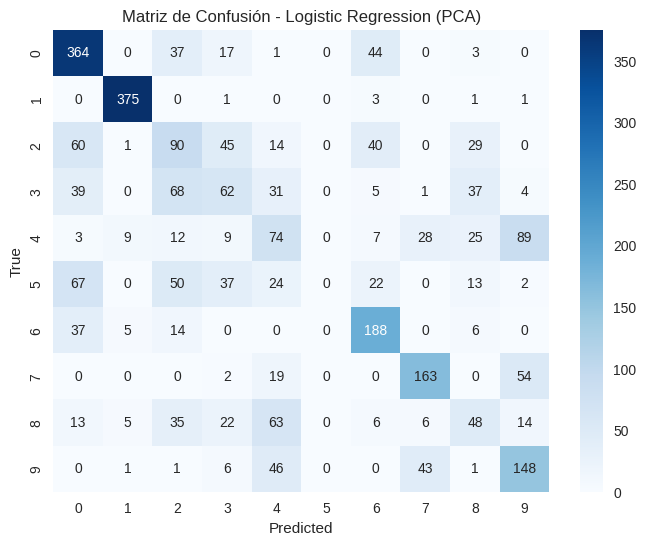

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


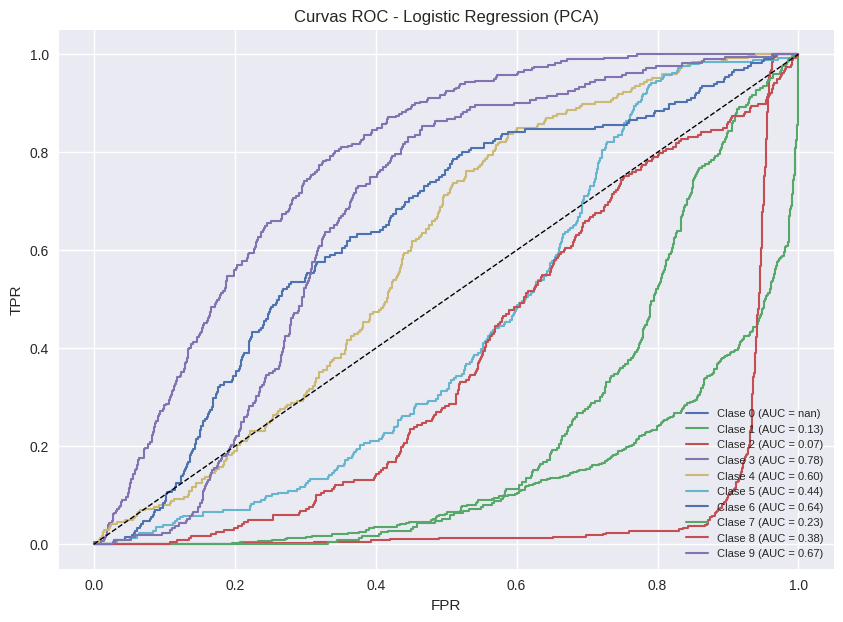

In [ ]:
# 1️⃣ Logistic Regression sobre PCA
lr_pca = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='multinomial')
train_and_evaluate(lr_pca, X_train_pca, X_test_pca, y_train, y_test, name="Logistic Regression (PCA)")



🔍 Modelo: Random Forest (UMAP)

📊 Classification Report:

              precision    recall  f1-score   support

           1       0.95      0.98      0.97       466
           2       0.98      0.99      0.99       381
           3       0.95      0.94      0.94       279
           4       0.94      0.93      0.94       247
           5       0.96      0.93      0.94       256
           6       0.95      0.92      0.94       215
           7       0.96      0.98      0.97       250
           8       0.94      0.95      0.95       238
           9       0.95      0.89      0.92       212
          10       0.90      0.96      0.93       246

    accuracy                           0.95      2790
   macro avg       0.95      0.95      0.95      2790
weighted avg       0.95      0.95      0.95      2790

📉 Confusion Matrix:


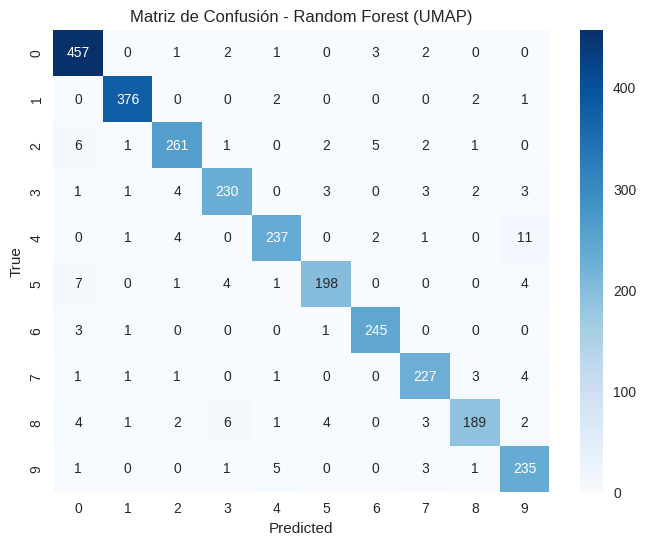

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


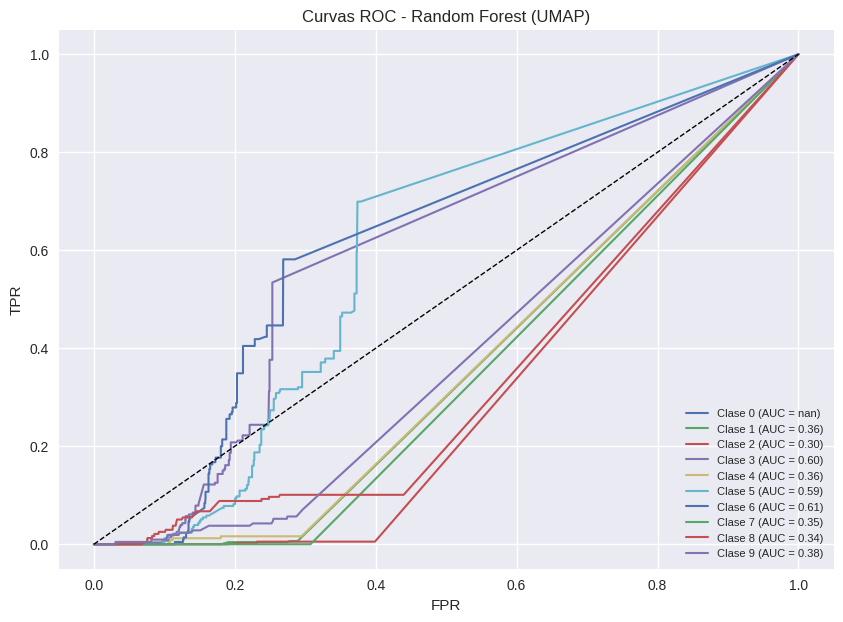

In [ ]:
# 2️⃣ Random Forest sobre UMAP
rf_umap = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
train_and_evaluate(rf_umap, X_train_umap, X_test_umap, y_train, y_test, name="Random Forest (UMAP)")



🔍 Modelo: MLP Neural Net (PCA)

📊 Classification Report:

              precision    recall  f1-score   support

           1       0.64      0.77      0.70       466
           2       0.97      0.98      0.98       381
           3       0.29      0.38      0.33       279
           4       0.28      0.26      0.27       247
           5       0.28      0.20      0.24       256
           6       0.23      0.05      0.08       215
           7       0.66      0.68      0.67       250
           8       0.62      0.76      0.68       238
           9       0.32      0.23      0.27       212
          10       0.45      0.55      0.49       246

    accuracy                           0.54      2790
   macro avg       0.47      0.49      0.47      2790
weighted avg       0.51      0.54      0.52      2790

📉 Confusion Matrix:


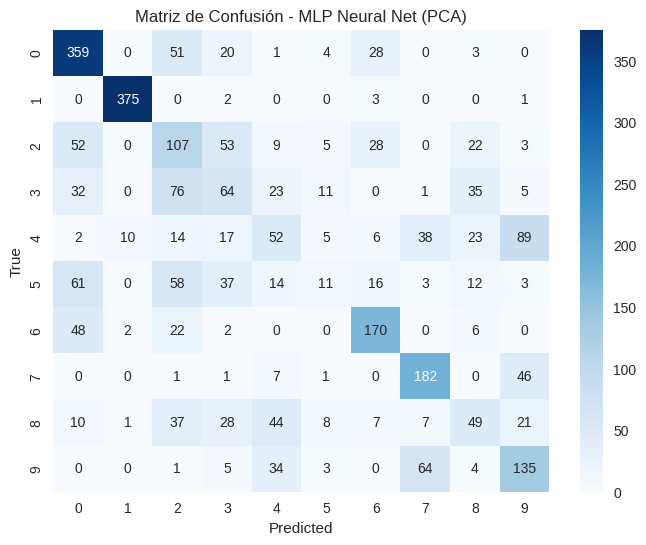

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


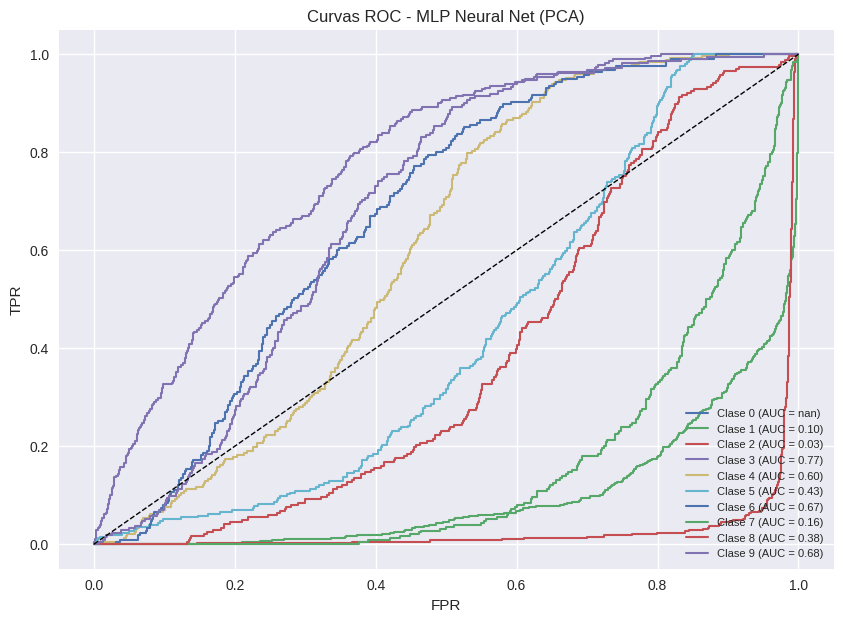

In [ ]:
# 3️⃣ MLPClassifier (Deep Learning) sobre PCA
mlp_pca = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu',
                                max_iter=200, alpha=1e-4, random_state=42))
train_and_evaluate(mlp_pca, X_train_pca, X_test_pca, y_train, y_test, name="MLP Neural Net (PCA)")


## ✅ Discusión

- **Logistic Regression (PCA)**:
  - Se comporta bien si las clases son aproximadamente linealmente separables.
  - Rápido de entrenar, pero limitado en expresividad.

- **Random Forest (UMAP)**:
  - Modelo no lineal ideal para datos proyectados con estructura compleja.
  - Captura relaciones de vecindad preservadas por UMAP.

- **MLPClassifier (PCA)**:
  - Modelo de aprendizaje profundo con buena capacidad para adaptarse a distribuciones complejas.
  - Mejora sobre PCA debido a la no linealidad, especialmente si se escalan los datos.

Las **curvas ROC** permiten observar el desempeño por clase. Las clases con menos confusión tienen curvas más cercanas a la esquina superior izquierda y AUC más altos.
